# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Using $p_h = h$ and combining the three constraints (2), (3) and (4) in order to get one constraint: 
$$m = rh + \tau^gh\epsilon + \tau^p max[h\epsilon - \bar{p} , 0] + c$$
$$c = m - rh - \tau^gh\epsilon - \tau^p max[h\epsilon - \bar{p} , 0] $$

Imports and set magics:

In [1]:
import numpy as np

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


# local modules
import inauguralproject
from scipy import optimize 
import matplotlib.pyplot as plt

# Question 1

BRIEFLY EXPLAIN HOW YOU SOLVE THE MODEL.

In [2]:
#Defining values
m= 0.5
phi = 0.3
epsilon = 0.5
r = 0.03
tau_g = 0.012
tau_p = 0.004
p_bar = 3


def u_func(c, h, phi):
    """
    A function that computes the utillity of the household
    Args:
        c: (float) Amount of consumption 
        h: (float) Amount of housing
        phi : (float) A parameter that determines the weights of h and c in the utility function
        
    Returns a float
    """
    return c**(1-phi)*(h**phi)

def c_func(h, m, r, tau_g, epsilon, tau_p, p_bar):
    """
    A function that computes the consumption amount
    Args:
       m (float): cash on hand
       r (float): interest rate
       h (float): Amount of housing
       tau_g (float): Base housing tax
       epsilon (float): Public house pricing asessment factor
       tau_p (float): Progressive housing tax
       p_bar (float): Cutoff price for progressive tax 
    
    Returns: 
    (float): Amount of consumption
    """
    return m - r*h - tau_g * h * epsilon - tau_p * max(h*epsilon-p_bar,0)


def objective_func(h, m, tau_g, tau_p, epsilon, p_bar, r, phi):
    """
    Objective function to be minimized
    Args:
        h (float): Amount of housing
        m (float): cash on hand
        tau_g (float): Base housing tax
        tau_p (float): Progressive housing tax
        epsilon (float): Public house pricing asessment factor
        p_bar (float): Cutoff price for progressive tax 
        r (float): interest rate
        phi : (float) A parameter that determines the weights of h and c in the utility function
        
    Returns:
        (float): Objective function
        
    """
    c = c_func(h, m, r, tau_g, epsilon, tau_p, p_bar)
    
    return -u_func(c, h, phi)


def solver(m, tau_g, tau_p, epsilon, p_bar, r, phi):
    """
    Solver function
    Args:
        m (float): cash on hand
        tau_g (float): Base housing tax
        tau_p (float): Progressive housing tax
        epsilon (float): Public house pricing asessment factor
        p_bar (float): Cutoff price for progressive tax 
        r (float): interest rate
        phi : (float) A parameter that determines the weights of h and c in the utility function
    
    Return:
    (array): Optimal amount of h, conditional on constraint
    
    """

    return optimize.minimize_scalar(objective_func, args=(m, tau_g, tau_p, epsilon, p_bar, r, phi), 
                                   bounds= None)


h_best = solver(m, tau_g, tau_p, epsilon, p_bar, r, phi).x
c_best = c_func(h_best, m, r, tau_g, epsilon, tau_p, p_bar)
u_best = u_func(c_best, h_best, phi)

print(f'The optimal amount of housing is: h = {h_best:.5f}')
print(f'The optimal amount of consumption is: c = {c_best:.5f}')
print(f'The maximized utility is: u  = {u_best:.5f}')



The optimal amount of housing is: h = 4.16667
The optimal amount of consumption is: c = 0.35000
The maximized utility is: u  = 0.73584


# Question 2

ADD ANSWER.

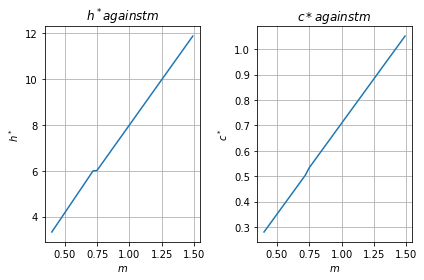

In [37]:

h_list=[]
c_list=[]
m_list=[]

for m in np.arange(0.4, 1.5, 0.01):
    h_best = solver(m, tau_g, tau_p, epsilon, p_bar, r, phi).x
    c_best = c_func(h_best, m, r, tau_g, epsilon, tau_p, p_bar)
    h_list.append(h_best)
    c_list.append(c_best)
    m_list.append(m)

# Figure of h and c as a function of m

# c. left plot
fig = plt.figure()
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(m_list,h_list)

ax_left.set_title('$h^* against m$')
ax_left.set_xlabel('$m$')
ax_left.set_ylabel('$h^*$')
ax_left.grid(True)

# c. right plot
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(m_list,c_list)

ax_right.set_title('$c* against m$')
ax_right.set_xlabel('$m$')
ax_right.set_ylabel('$c^*$')
ax_right.grid(True)
plt.tight_layout()





# Question 3

ADD ANSWER.

In [57]:
# Function to calculate tax burden
np.random.seed(1)
from statistics import mean
def tax_burden(tau_g, h, epsilon, tau_p, p_bar):
    return tau_g*h*epsilon + tau_p*max(h*epsilon - p_bar, 0)

m_random = np.random.lognormal(-0.4,0.35,10000)
print(type(m_random))

household_tax = []
for m in m_random:
        h_best = solver(m, tau_g, tau_p, epsilon, p_bar, r, phi).x
        household_tax.append(tax_burden(tau_g, h_best, epsilon, tau_p, p_bar)) 

print(mean(household_tax))


<class 'numpy.ndarray'>
0.03632680340431285


# Question 4

ADD ANSWER.

In [5]:
# code

# Question 5

ADD ANSWER.

In [6]:
# code

# Conclusion

ADD CONCISE CONLUSION.